In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import datetime

In [13]:
G = nx.MultiGraph()
G.add_nodes_from(['a','b','c','d','e','f','g','h'])
G.add_edges_from([('a','b'),('a','c'),('b','d'),('c','e'),('c','d'),('d','f'),('f','e'),('e','g')])

In [14]:
i=0
while(1):
    print(i,"번째",datetime.datetime.utcnow())
    i += 1
    remove_edge_list = []
    edge_btw = nx.edge_betweenness_centrality(G)
    
    if len(set(edge_btw.values())) == 1:
        break
    
    else:
        for k,v in edge_btw.items():
            if v == max(edge_btw.values()):
                remove_edge_list.append(k)
        G.remove_edges_from(remove_edge_list)

0 번째 2017-03-07 09:02:30.839093
1 번째 2017-03-07 09:02:30.839611
2 번째 2017-03-07 09:02:30.840169


/home/seojayoung/miniconda3/envs/ml_python/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/seojayoung/miniconda3/envs/ml_python/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/seojayoung/miniconda3/envs/ml_python/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/seojayoung/miniconda3/envs/ml_python/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarni

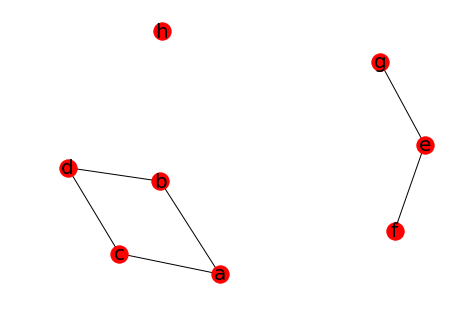

In [15]:
nx.draw(G, font_size=20, with_labels=['a','b','c','d','e','f'])
plt.show()

In [43]:
connected_graph = nx.to_dict_of_lists(G)
print(connected_graph)

{'e': ['f', 'g'], 'c': ['a', 'd'], 'f': ['e'], 'g': ['e'], 'a': ['c', 'b'], 'd': ['c', 'b'], 'b': ['a', 'd'], 'h': []}


In [44]:
del_key = []

for k,v in connected_graph.items():
    if v == []:
        del_key.append(k)

print(del_key)

['h']


In [45]:
for k in del_key:
    del connected_graph[k]

In [46]:
connected_graph

{'a': ['c', 'b'],
 'b': ['a', 'd'],
 'c': ['a', 'd'],
 'd': ['c', 'b'],
 'e': ['f', 'g'],
 'f': ['e'],
 'g': ['e']}

In [69]:
inventor_list = set(['a','b','c','d','e','f','g','h'])
set_del_key = set(del_key)

In [71]:
inventor = inventor_list - set_del_key
print(inventor)

{'e', 'g', 'c', 'f', 'a', 'b', 'd'}


In [77]:
def connected_components(nodes):
    
    result = []
    nodes = set(nodes)
            
    while nodes:
        
        n = nodes.pop()
        group = {n}
        queue = [n]

        while queue:

            n = queue.pop(0)
            neighbors = set(connected_graph[n])

            neighbors.difference_update(group)
            nodes.difference_update(neighbors)
            group.update(neighbors)
            queue.extend(neighbors)
            
        result.append(group)
    
    return result
    
all_group = []
number = 1
for components in connected_components(inventor):
    names = sorted(node for node in components)
    group = list(names)
    all_group.append(group)
    number += 1

In [78]:
all_group

[['e', 'f', 'g'], ['a', 'b', 'c', 'd']]

In [79]:
G.neighbors('a')

['c', 'b']